In [48]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

i will be loading an already cleaned monthly dataframes

In [49]:
%store -r df_jan_clean
%store -r df_feb_clean
%store -r df_mar_clean
%store -r df_apr_clean
%store -r df_may_clean
%store -r df_jun_clean
%store -r df_jul_clean
%store -r df_aug_clean
%store -r df_sep_clean
%store -r df_oct_clean
%store -r df_nov_clean
%store -r df_dec_clean

Adding 'Month' column to each dataframes

In [51]:
df_jan_clean['Month'] = df_jan_clean['Order Date'].dt.strftime('%B')
df_feb_clean['Month'] = df_feb_clean['Order Date'].dt.strftime('%B')
df_mar_clean['Month'] = df_mar_clean['Order Date'].dt.strftime('%B')
df_apr_clean['Month'] = df_apr_clean['Order Date'].dt.strftime('%B')
df_may_clean['Month'] = df_may_clean['Order Date'].dt.strftime('%B')
df_jun_clean['Month'] = df_jun_clean['Order Date'].dt.strftime('%B')
df_jul_clean['Month'] = df_jul_clean['Order Date'].dt.strftime('%B')
df_aug_clean['Month'] = df_aug_clean['Order Date'].dt.strftime('%B')
df_sep_clean['Month'] = df_sep_clean['Order Date'].dt.strftime('%B')
df_oct_clean['Month'] = df_oct_clean['Order Date'].dt.strftime('%B')
df_nov_clean['Month'] = df_nov_clean['Order Date'].dt.strftime('%B')
df_dec_clean['Month'] = df_dec_clean['Order Date'].dt.strftime('%B')


In [53]:
sel = ['Month', 'Total']
df1 = df_jan_clean[sel]
df2 = df_feb_clean[sel]
df3 = df_mar_clean[sel]
df4 = df_apr_clean[sel]
df5 = df_may_clean[sel]
df6 = df_jun_clean[sel]
df7 = df_jul_clean[sel]
df8 = df_aug_clean[sel]
df9 = df_sep_clean[sel]
df10 = df_oct_clean[sel]
df11 = df_nov_clean[sel]
df12 = df_dec_clean[sel]

koncat = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
merge_df = pd.concat(koncat, axis = 0)

In [54]:
merge_df

,Month,Total
0,January,700.00
1,January,14.95
2,January,23.98
3,January,149.99
4,January,11.99
...,...,...
25112,December,14.95
25113,December,7.68
25114,December,400.00
25115,December,11.99


In [55]:
monthly_total = merge_df.groupby('Month')['Total'].sum().reset_index()

In [56]:
monthly_total

,Month,Total
0,April,3389217.98
1,August,2241083.37
2,December,4608295.70
3,February,2200078.08
4,January,1821413.16
5,July,2646461.32
6,June,2576280.15
7,March,2804973.35
8,May,3150616.23
9,November,3197875.05


In [57]:
month_order = ['January', 
              'February',
              'March',
              'April',
              'May',
              'June',
              'July',
              'August',
              'September',
              'October',
              'November',
              'December']
monthly_total['Month'] = pd.Categorical(monthly_total['Month'], categories = month_order, ordered = True)
monthly_total = monthly_total.sort_values('Month')

In [58]:
monthly_total

,Month,Total
4,January,1821413.16
3,February,2200078.08
7,March,2804973.35
0,April,3389217.98
8,May,3150616.23
6,June,2576280.15
5,July,2646461.32
1,August,2241083.37
11,September,2094465.69
10,October,3734777.86


In [59]:
monthly_total_sorted = monthly_total.sort_values(by = 'Total', ascending =  False)

In [60]:
most_sale_month = monthly_total_sorted.iloc[0]

In [61]:
print('The month with the most sale was:', most_sale_month['Month'], 'with a total of ', most_sale_month['Total'], 'total sales')

The month with the most sale was: December with a total of  4608295.7 total sales


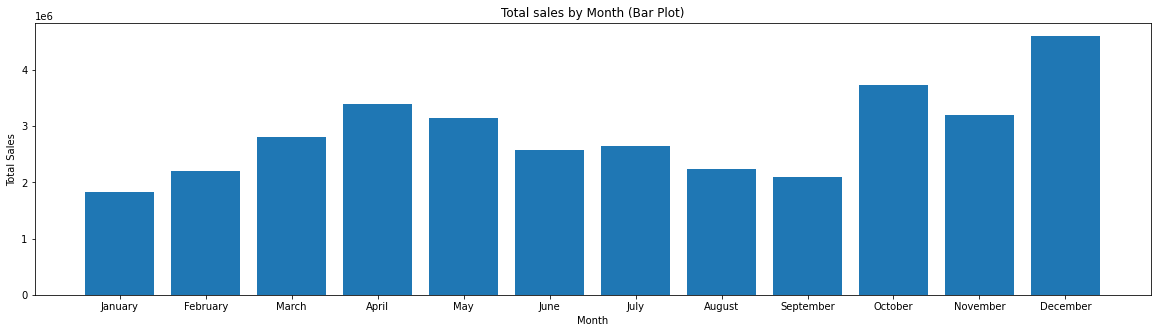

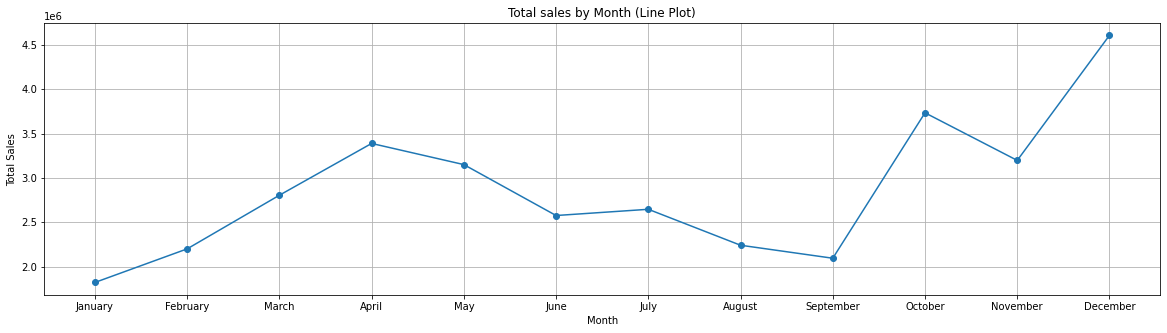

In [62]:
#creat a bar plot
plt.figure(figsize = (20, 5))
plt.bar(monthly_total['Month'], monthly_total['Total'], tick_label = monthly_total['Month'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total sales by Month (Bar Plot)')
plt.show()

#create a line plot
plt.figure(figsize = (20, 5))
plt.plot(monthly_total['Month'], monthly_total['Total'], marker = 'o', linestyle = '-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total sales by Month (Line Plot)')
plt.xticks(monthly_total['Month'])
plt.grid(True)
plt.show()



In [63]:
sel = ['City', 'Total']
df11 = df_jan_clean[sel]
df12 = df_feb_clean[sel]
df13 = df_mar_clean[sel]
df14 = df_apr_clean[sel]
df15 = df_may_clean[sel]
df16 = df_jun_clean[sel]
df17 = df_jul_clean[sel]
df18 = df_aug_clean[sel]
df19 = df_sep_clean[sel]
df110 = df_oct_clean[sel]
df111 = df_nov_clean[sel]
df112 = df_dec_clean[sel]

koncatt = [df11, df12, df13, df14, df15, df16, df17, df18, df19, df110, df111, df112]
merge_df1 = pd.concat(koncatt, axis = 0)

In [64]:
merge_df1

,City,Total
0,Boston,700.00
1,Portland,14.95
2,San Francisco,23.98
3,Los Angeles,149.99
4,Austin,11.99
...,...,...
25112,San Francisco,14.95
25113,Los Angeles,7.68
25114,Seattle,400.00
25115,Dallas,11.99


In [65]:
city_total = merge_df1.sort_values('City')

In [66]:
city_total

,City,Total
10563,Atlanta,14.95
982,Atlanta,14.95
983,Atlanta,109.99
18527,Atlanta,11.99
6133,Atlanta,3.84
...,...,...
11356,Seattle,11.95
11527,Seattle,14.95
11529,Seattle,11.52
11317,Seattle,11.99


In [67]:
city_total_group = city_total.groupby('City')['Total'].sum().reset_index()

In [68]:
city_total_group

,City,Total
0,Atlanta,2794199.07
1,Austin,1818044.33
2,Boston,3658627.65
3,Dallas,2765373.96
4,Los Angeles,5448304.28
5,New York City,4661867.14
6,Portland,2319331.94
7,San Francisco,8254743.55
8,Seattle,2745046.02


In [69]:
city_total_group_sorted = city_total_group.sort_values(by = 'Total', ascending= False)

In [70]:
city_total_group_sorted

,City,Total
7,San Francisco,8254743.55
4,Los Angeles,5448304.28
5,New York City,4661867.14
2,Boston,3658627.65
0,Atlanta,2794199.07
3,Dallas,2765373.96
8,Seattle,2745046.02
6,Portland,2319331.94
1,Austin,1818044.33


In [71]:
most_sale_city = city_total_group_sorted.iloc[0]

In [72]:
print("City with most sale is",most_sale_city['City'], "with", most_sale_city['Total'], "total sales")

City with most sale is San Francisco with 8254743.55 total sales


C:\Users\UTIBE INYANG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


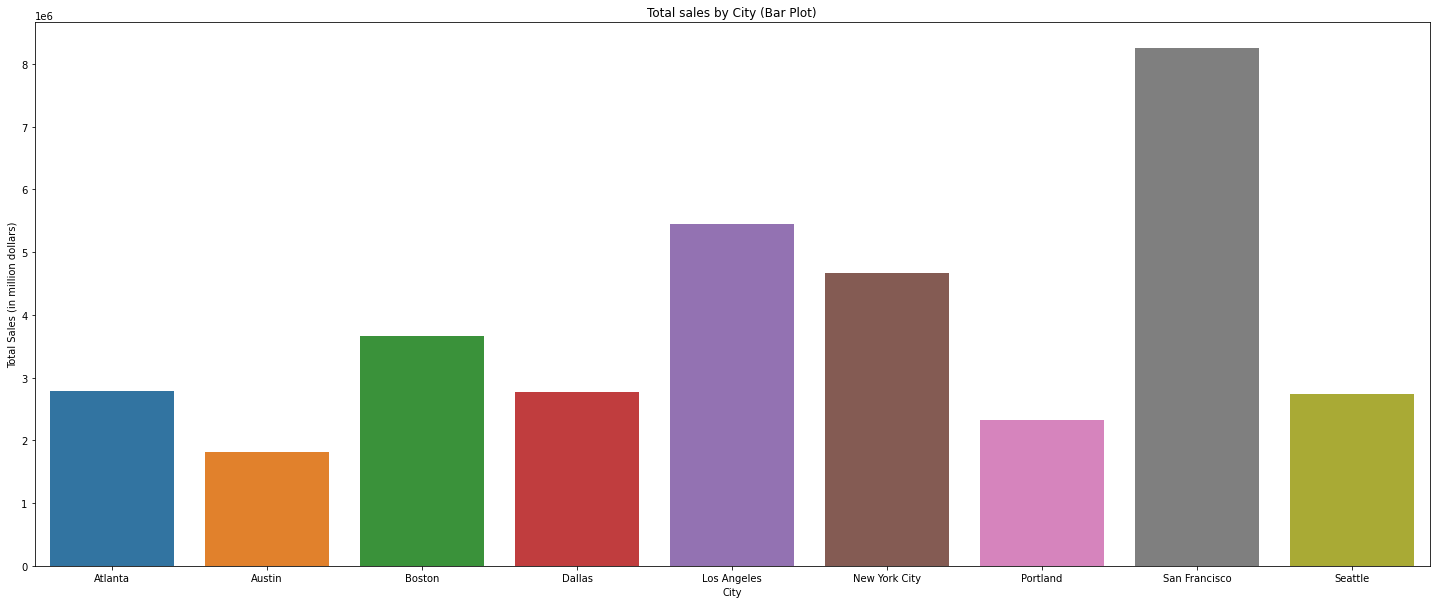

In [143]:

#creat a bar plot
plt.figure(figsize = (25, 10))
sns.barplot(city_total_group['City'], city_total_group['Total'], )
plt.xlabel('City')
plt.ylabel('Total Sales (in million dollars)')
plt.title('Total sales by City (Bar Plot)')
plt.show()

In [75]:
df_apr_clean['Hour'] = df_apr_clean['Order Date'].dt.hour

In [76]:
df_jan_clean['Hour'] = df_jan_clean['Order Date'].dt.hour
df_feb_clean['Hour'] = df_feb_clean['Order Date'].dt.hour
df_mar_clean['Hour'] = df_mar_clean['Order Date'].dt.hour
df_may_clean['Hour'] = df_may_clean['Order Date'].dt.hour
df_jun_clean['Hour'] = df_jun_clean['Order Date'].dt.hour
df_jul_clean['Hour'] = df_jul_clean['Order Date'].dt.hour
df_aug_clean['Hour'] = df_aug_clean['Order Date'].dt.hour
df_sep_clean['Hour'] = df_sep_clean['Order Date'].dt.hour
df_oct_clean['Hour'] = df_oct_clean['Order Date'].dt.hour
df_nov_clean['Hour'] = df_nov_clean['Order Date'].dt.hour
df_dec_clean['Hour'] = df_dec_clean['Order Date'].dt.hour

In [78]:
sel = ['Hour', 'Total']
df11h = df_jan_clean[sel]
df12h = df_feb_clean[sel]
df13h = df_mar_clean[sel]
df14h = df_apr_clean[sel]
df15h = df_may_clean[sel]
df16h = df_jun_clean[sel]
df17h = df_jul_clean[sel]
df18h = df_aug_clean[sel]
df19h = df_sep_clean[sel]
df110h = df_oct_clean[sel]
df111h = df_nov_clean[sel]
df112h = df_dec_clean[sel]

concat_hour = [df11h, df12h, df13h, df14h, df15h, df16h, df17h, df18h, df19h, df110h, df111h, df112h]
merge_df_hour = pd.concat(concat_hour, axis = 0)

In [79]:
merge_df_hour

,Hour,Total
0,21,700.00
1,14,14.95
2,13,23.98
3,20,149.99
4,11,11.99
...,...,...
25112,20,14.95
25113,12,7.68
25114,6,400.00
25115,10,11.99


In [80]:
merge_df_hour_sorted = merge_df_hour.sort_values(by = 'Hour')

In [81]:
merge_df_hour_sorted

,Hour,Total
4779,0,11.99
2142,0,3.84
9316,0,150.00
14877,0,3.84
7595,0,11.99
...,...,...
1586,23,2.99
2199,23,379.99
2196,23,11.99
3551,23,2.99


In [82]:
merge_df_hour_group = merge_df_hour.groupby('Hour')['Total'].sum().reset_index()

In [83]:
merge_df_hour_group

,Hour,Total
0,0,713548.66
1,1,460563.90
2,2,234839.45
3,3,145742.94
4,4,162546.07
5,5,230664.87
6,6,447963.01
7,7,744067.32
8,8,1192309.20
9,9,1638784.04


In [84]:
merge_df_hour_group_sorted = merge_df_hour_group.sort_values(by = 'Total', ascending= False)

In [85]:
merge_df_hour_group_sorted

,Hour,Total
19,19,2411971.14
12,12,2314359.85
11,11,2296619.84
20,20,2280784.36
18,18,2218374.01
13,13,2152369.98
17,17,2126553.97
14,14,2082513.70
21,21,2040790.48
10,10,1942988.08


In [86]:
most_sale_by_hour = merge_df_hour_group_sorted.iloc[0]
print('The hour with the most sale is:' ,most_sale_by_hour['Hour'], 'with', most_sale_by_hour['Total'], 'total sales')

The hour with the most sale is: 19.0 with 2411971.14 total sales


C:\Users\UTIBE INYANG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


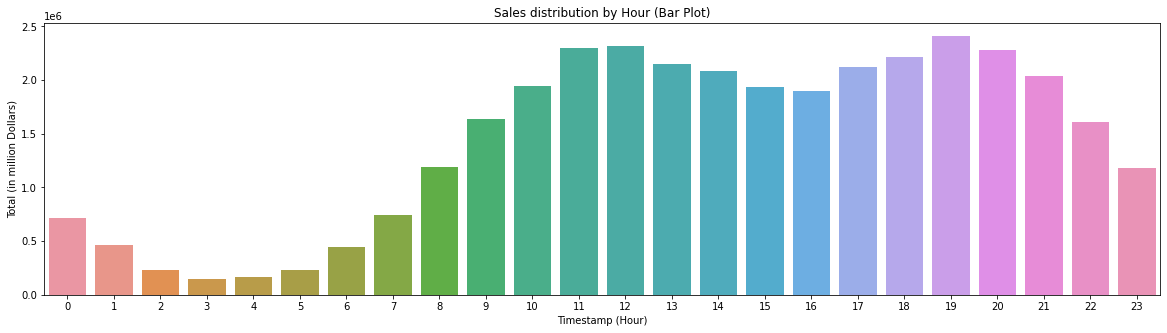

In [87]:
plt.figure(figsize=(20 , 5))
sns.barplot(merge_df_hour_group['Hour'], merge_df_hour_group['Total'])
plt.title('Sales distribution by Hour (Bar Plot)')
plt.xlabel('Timestamp (Hour)')
plt.ylabel('Total (in million Dollars)')
plt.show()

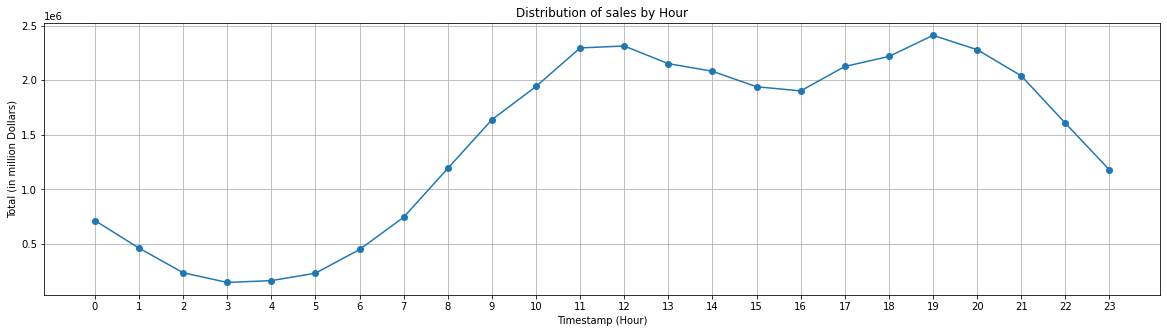

In [88]:
plt.figure(figsize=(20, 5))
plt.plot(merge_df_hour_group['Hour'], merge_df_hour_group['Total'], marker = 'o', linestyle = '-')
plt.title('Distribution of sales by Hour')
plt.xlabel('Timestamp (Hour)')
plt.ylabel('Total (in million Dollars)')
plt.grid(True)
plt.xticks(range(24))
plt.show()

The best time to carry out advertisement campaigns is between 10:00 hours and 21:00 hours

In [89]:
import random

In [ ]:
del merge_df_hour['Group']

In [ ]:
del merge_df_hour['Order ID']

In [ ]:
merge_df_hour

,Hour,Total
0,21,700.00
1,14,14.95
2,13,23.98
3,20,149.99
4,11,11.99
...,...,...
25112,20,14.95
25113,12,7.68
25114,6,400.00
25115,10,11.99


In [92]:
sel = ['Order ID', 'Product']
df11h = df_jan_clean[sel]
df12h = df_feb_clean[sel]
df13h = df_mar_clean[sel]
df14h = df_apr_clean[sel]
df15h = df_may_clean[sel]
df16h = df_jun_clean[sel]
df17h = df_jul_clean[sel]
df18h = df_aug_clean[sel]
df19h = df_sep_clean[sel]
df110h = df_oct_clean[sel]
df111h = df_nov_clean[sel]
df112h = df_dec_clean[sel]

concat_product = [df11h, df12h, df13h, df14h, df15h, df16h, df17h, df18h, df19h, df110h, df111h, df112h]
merge_df_product = pd.concat(concat_product, axis = 0)

In [93]:
merge_df_product

,Order ID,Product
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones
...,...,...
25112,319666,Lightning Charging Cable
25113,319667,AA Batteries (4-pack)
25114,319668,Vareebadd Phone
25115,319669,Wired Headphones


In [98]:
transactions = merge_df_product.groupby('Order ID')['Product'].apply(list).reset_index(name = 'Items')

In [99]:
transactions

,Order ID,Items
0,141234,[iPhone]
1,141235,[Lightning Charging Cable]
2,141236,[Wired Headphones]
3,141237,[27in FHD Monitor]
4,141238,[Wired Headphones]
...,...,...
178432,319666,[Lightning Charging Cable]
178433,319667,[AA Batteries (4-pack)]
178434,319668,[Vareebadd Phone]
178435,319669,[Wired Headphones]


In [ ]:
pip install mlxtend


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [96]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [100]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(transactions['Items'].apply(pd.Series), prefix='', prefix_sep='').fillna(0)

# Concatenate the encoded data with the Order ID
encoded_df = pd.concat([transactions['Order ID'], encoded_df], axis=1)


In [101]:
encoded_df

,Order ID,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,...,Wired Headphones,iPhone,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),Apple Airpods Headphones,USB-C Charging Cable,Wired Headphones,iPhone,Google Phone
0,141234,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,141235,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,141236,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,141237,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,141238,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178432,319666,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178433,319667,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178434,319668,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178435,319669,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Define minimum support threshold (e.g., 0.01)
min_support = 0.001

# Generate frequent itemsets
frequent_itemsets = apriori(encoded_df.drop(columns='Order ID'), min_support=min_support, use_colnames=True)


C:\Users\UTIBE INYANG\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [120]:
frequent_itemsets

,support,itemsets
0,0.022540,(20in Monitor)
1,0.034208,(27in 4K Gaming Monitor)
2,0.041202,(27in FHD Monitor)
3,0.033939,(34in Ultrawide Monitor)
4,0.113233,(AA Batteries (4-pack))
5,0.113334,(AAA Batteries (4-pack))
6,0.083559,(Apple Airpods Headphones)
7,0.071549,(Bose SoundSport Headphones)
8,0.026345,(Flatscreen TV)
9,0.030352,(Google Phone)


In [121]:
# Define minimum confidence threshold (e.g., 0.5)
min_confidence = 0.01

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)


In [123]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Google Phone),(Bose SoundSport Headphones),0.030352,0.002684,0.001037,0.034158,12.724551,0.000955,1.032587,0.950254
1,(Bose SoundSport Headphones),(Google Phone),0.002684,0.030352,0.001037,0.386221,12.724551,0.000955,1.579800,0.923892
2,(Google Phone),(USB-C Charging Cable),0.030352,0.009421,0.005515,0.181684,19.285622,0.005229,1.210509,0.977827
3,(USB-C Charging Cable),(Google Phone),0.009421,0.030352,0.005515,0.585366,19.285622,0.005229,2.338562,0.957165
4,(Google Phone),(Wired Headphones),0.030352,0.001227,0.001715,0.056499,46.034515,0.001678,1.058582,1.008900
5,(Wired Headphones),(Google Phone),0.001227,0.030352,0.001715,1.397260,46.034515,0.001678,inf,0.979479
6,(USB-C Charging Cable),(Vareebadd Phone),0.009421,0.011360,0.002023,0.214753,18.904738,0.001916,1.259018,0.956110
7,(Vareebadd Phone),(USB-C Charging Cable),0.011360,0.009421,0.002023,0.178096,18.904738,0.001916,1.205225,0.957986
8,(Apple Airpods Headphones),(iPhone),0.003155,0.037672,0.001754,0.555950,14.757825,0.001635,2.167164,0.935190
9,(iPhone),(Apple Airpods Headphones),0.037672,0.003155,0.001754,0.046564,14.757825,0.001635,1.045528,0.968733


Based on the support level
The best product combinations are
iPhone and the Lightning Charging Cable
USB-C Charging Cable and the Google phone

In [124]:
sel = [ 'Product', 'Total']
df11h = df_jan_clean[sel]
df12h = df_feb_clean[sel]
df13h = df_mar_clean[sel]
df14h = df_apr_clean[sel]
df15h = df_may_clean[sel]
df16h = df_jun_clean[sel]
df17h = df_jul_clean[sel]
df18h = df_aug_clean[sel]
df19h = df_sep_clean[sel]
df110h = df_oct_clean[sel]
df111h = df_nov_clean[sel]
df112h = df_dec_clean[sel]

concat_product_total = [df11h, df12h, df13h, df14h, df15h, df16h, df17h, df18h, df19h, df110h, df111h, df112h]
merge_df_product_total = pd.concat(concat_product_total, axis = 0)

In [125]:
merge_df_product_total

,Product,Total
0,iPhone,700.00
1,Lightning Charging Cable,14.95
2,Wired Headphones,23.98
3,27in FHD Monitor,149.99
4,Wired Headphones,11.99
...,...,...
25112,Lightning Charging Cable,14.95
25113,AA Batteries (4-pack),7.68
25114,Vareebadd Phone,400.00
25115,Wired Headphones,11.99


In [126]:
merge_df_product_total_group = merge_df_product_total.groupby('Product')['Total'].sum().reset_index()

In [127]:
merge_df_product_total_group

,Product,Total
0,20in Monitor,453818.74
1,27in 4K Gaming Monitor,2433147.61
2,27in FHD Monitor,1131074.59
3,34in Ultrawide Monitor,2352898.08
4,AA Batteries (4-pack),106041.60
5,AAA Batteries (4-pack),92648.14
6,Apple Airpods Headphones,2345550.00
7,Bose SoundSport Headphones,1342865.70
8,Flatscreen TV,1443900.00
9,Google Phone,3317400.00


In [133]:
merge_df_product_total_group_sorted = merge_df_product_total_group.sort_values(by = 'Total', ascending=False)

In [134]:
merge_df_product_total_group_sorted

,Product,Total
13,Macbook Pro Laptop,8032500.00
18,iPhone,4792900.00
14,ThinkPad Laptop,4127958.72
9,Google Phone,3317400.00
1,27in 4K Gaming Monitor,2433147.61
3,34in Ultrawide Monitor,2352898.08
6,Apple Airpods Headphones,2345550.00
8,Flatscreen TV,1443900.00
7,Bose SoundSport Headphones,1342865.70
2,27in FHD Monitor,1131074.59


In [135]:

most_sold_product = merge_df_product_total_group_sorted.iloc[0]
print('The product that was sold the most is' , most_sold_product['Product'], 'with', most_sold_product['Total'], 'total sales')

The product that was sold the most is Macbook Pro Laptop with 8032500.0 total sales


C:\Users\UTIBE INYANG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


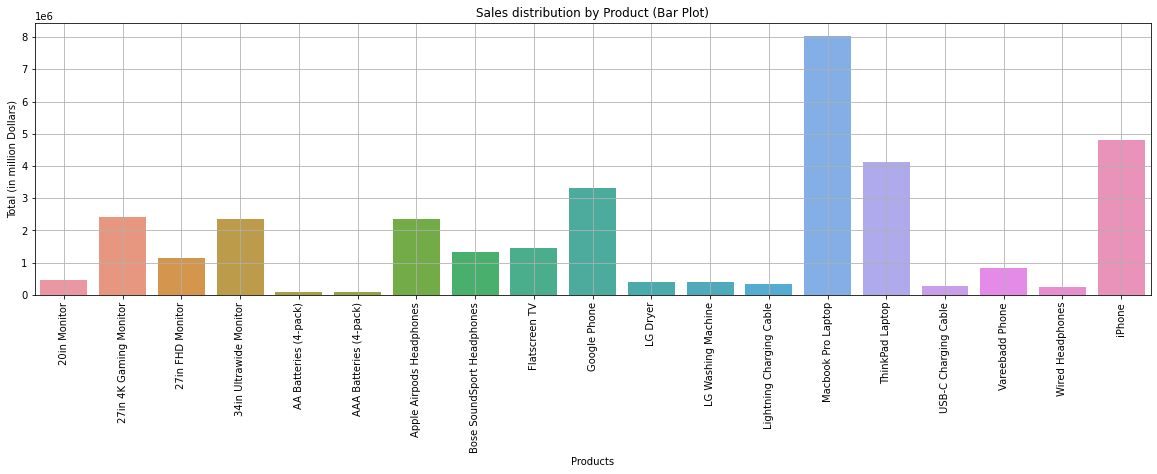

In [140]:
plt.figure(figsize=(20, 5))
sns.barplot(merge_df_product_total_group['Product'], merge_df_product_total_group['Total'])
plt.title('Sales distribution by Product (Bar Plot)')
plt.xlabel('Products')
plt.ylabel('Total (in million Dollars)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()